OBJETIVOS A SEREM DECIFRADOS:

    Relação entre Nível de Experiência e Salário

    Impacto do Tipo de Contrato no Salário

    Diferença Salarial entre as 5 Profissões mais bem pagas

    Localização Geográfica e Salário

    Porcentagem de Trabalho Remoto e Salário

    Tamanho da Empresa e Salário

    Maior quantidade de pessoas por profissão

    Conclusões finais no fim do código.

In [167]:
import pandas as pd 
import matplotlib.pyplot as plt
import colorsys
import matplotlib.colors

In [168]:
base_salarios = pd.read_excel(r'ds_salaries.xlsx')


In [169]:
base_salarios['VAL SAL DOLLAR'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: VAL SAL DOLLAR, dtype: float64

In [170]:
base_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      607 non-null    int64 
 1   ANO                             607 non-null    int64 
 2   NIVEL EXPERIENCIA               607 non-null    object
 3   TIPO DE CONTRATO                607 non-null    object
 4   PROFISSAO                       607 non-null    object
 5   SALARIO                         607 non-null    int64 
 6   MOEDA SALARIAL                  607 non-null    object
 7   VAL SAL DOLLAR                  607 non-null    int64 
 8   LOCAL ONDE MORA                 607 non-null    object
 9   PORCENTAGEM DE TRABALHO REMOTO  607 non-null    int64 
 10  LOCAL DA EMPRESA                607 non-null    object
 11  TAMANHO DA EMPRESA              607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [171]:
base_salarios['ANO'] = pd.to_datetime(base_salarios['ANO'].astype(str), format='%Y').dt.year

In [291]:
base_salarios = base_salarios.sort_values(by='VAL SAL DOLLAR', ascending=False)
base_salarios.head(15)

,Unnamed: 0,ANO,NIVEL EXPERIENCIA,TIPO DE CONTRATO,PROFISSAO,SALARIO,MOEDA SALARIAL,VAL SAL DOLLAR,LOCAL ONDE MORA,PORCENTAGEM DE TRABALHO REMOTO,LOCAL DA EMPRESA,TAMANHO DA EMPRESA
252,252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
33,33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
97,97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
157,157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
63,63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
523,523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
519,519,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
25,25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
482,482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M


,Nº profissionais,Salário Médio
SE,280,138617.29
MI,213,87996.06
EN,88,61643.32
EX,26,199392.04


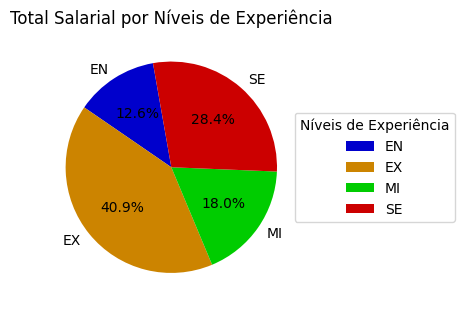

PORCENTAGEM DE TRABALHO REMOTO
NIVEL EXPERIENCIA PORCENTAGEM DE TRABALHO REMOTO                                
EN                100                                                         49
                  50                                                          25
                  0                                                           14
EX                100                                                         18
                  50                                                           5
                  0                                                            3
MI                100                                                        115
                  0                                                           56
                  50                                                          42
SE                100                                                        199
                  0                                                           54
                  50                                                          27

In [290]:
#  Relação entre Nível de Experiência e Salário 

contagem_niveis = base_salarios['NIVEL EXPERIENCIA'].value_counts()
#print(contagem_niveis)

medias_salarios = base_salarios.groupby('NIVEL EXPERIENCIA')['VAL SAL DOLLAR'].mean().round(2)
#print(media_salarios)

df_final = pd.concat([contagem_niveis, medias_salarios], axis=1)

df_final.columns = ['Nº profissionais', 'Salário Médio']

display(df_final)


cores = ['blue', 'orange', 'green', 'red']

cores_diminuidas = []
for cor in cores:
    h, l, s = colorsys.rgb_to_hls(*matplotlib.colors.to_rgb(cor))
    r, g, b = colorsys.hls_to_rgb(h, 0.4, s)
    cores_diminuidas.append((r, g, b))

fig, ax = plt.subplots(figsize=(3,3.5))
wedges, texts, autotexts = ax.pie(medias_salarios, labels=medias_salarios.index, autopct='%1.1f%%', startangle=100, colors=cores_diminuidas)

ax.legend(wedges, medias_salarios.index, title="Níveis de Experiência", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Total Salarial por Níveis de Experiência')
ax.axis('equal')  
plt.show()

# EX - Executivo 
# SE - Sênior 
# MI - Pleno
# SE - Júnior


exp_modelo = base_salarios.groupby('NIVEL EXPERIENCIA')['PORCENTAGEM DE TRABALHO REMOTO'].value_counts()
exp_modelo = pd.DataFrame(exp_modelo)
display(exp_modelo)



,TIPO DE CONTRATO
FT,588
PT,10
CT,5
FL,4


In [289]:
#   Impacto do Tipo de Contrato no Salário
tipos_contrato = pd.DataFrame(base_salarios['TIPO DE CONTRATO'].value_counts())
display(tipos_contrato)

# FT tempo integral 
# PT tempo parcial 
# CT contrato temporário
# FL contrato flexivel

medias_salarios_contrato = base_salarios.groupby('TIPO DE CONTRATO')['VAL SAL DOLLAR'].mean().round(2)
experiencia_contrato = base_salarios.groupby('TIPO DE CONTRATO')['NIVEL EXPERIENCIA'].value_counts()
display(experiencia_contrato)
display(medias_salarios_contrato)


,TIPO DE CONTRATO
FT,588
PT,10
CT,5
FL,4


TIPO DE CONTRATO  NIVEL EXPERIENCIA
CT                EN                     2
                  EX                     1
                  MI                     1
                  SE                     1
FL                MI                     3
                  SE                     1
FT                SE                   278
                  MI                   206
                  EN                    79
                  EX                    25
PT                EN                     7
                  MI                     3
Name: NIVEL EXPERIENCIA, dtype: int64

TIPO DE CONTRATO
CT    184575.00
FL     48000.00
FT    113468.07
PT     33070.50
Name: VAL SAL DOLLAR, dtype: float64

PROFISSAO
Data Analytics Lead         405000.00
Principal Data Engineer     328333.33
Financial Data Analyst      275000.00
Principal Data Scientist    215242.43
Director of Data Science    195074.00
Name: VAL SAL DOLLAR, dtype: float64

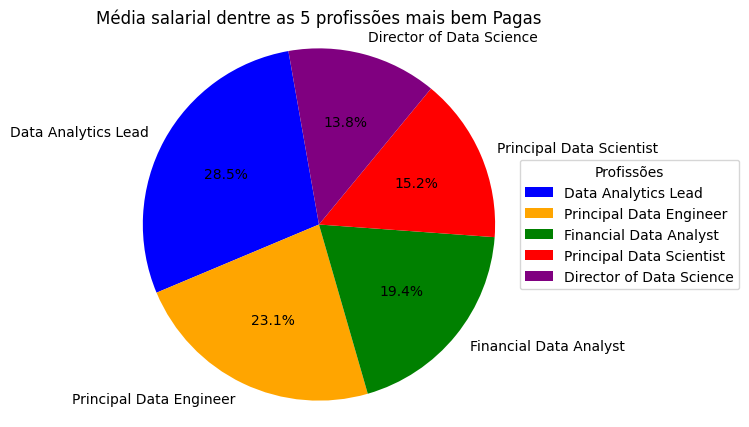

In [283]:
#   Diferença Salarial entre as 5 Profissões mais bem pagas

profissao_salario = base_salarios.groupby('PROFISSAO')['VAL SAL DOLLAR'].mean().round(2)
profissao_salario = profissao_salario.sort_values(ascending=False)

display(profissao_salario.head(5))

# Data Analytics Lead - Líder de Análise de Dados
# Principal Data Engineer - Engenheiro de Dados Principal
# Financial Data Analyst - Analista de Dados Financeiros
# Principal Data Scientist - Cientista de Dados Principal
# Director of Data Science - Diretor de Ciência de Dados

top5_profissoes = profissao_salario.head(5)

cores = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(5,5))
wedges, texts, autotexts = ax.pie(top5_profissoes, labels=top5_profissoes.index, autopct='%1.1f%%', startangle=100, colors=cores)

ax.legend(wedges, top5_profissoes.index, title="Profissões", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Média salarial dentre as 5 profissões mais bem Pagas')

ax.axis('equal')

plt.show()



In [275]:
#   Localização Geográfica e Salário

salario_geolocalizacao = base_salarios.groupby('LOCAL DA EMPRESA')['VAL SAL DOLLAR'].mean().round(2)
salario_geolocalizacao = salario_geolocalizacao.sort_values(ascending=False)

display(salario_geolocalizacao.head(8))

# Encontrar as profissões com os maiores salários em cada localização
profissoes_mais_bem_pagas_por_local = base_salarios.loc[base_salarios.groupby('LOCAL DA EMPRESA')['VAL SAL DOLLAR'].idxmax()][['LOCAL DA EMPRESA', 'PROFISSAO', 'VAL SAL DOLLAR', ]]

profissoes_mais_bem_pagas_por_local = profissoes_mais_bem_pagas_por_local.sort_values(by = 'VAL SAL DOLLAR', ascending= False)
# Exibir o resultado
print(profissoes_mais_bem_pagas_por_local.head(10))


#   US - Estados Unidos
#   JP - Japão
#   RU - Rússia
#   CA - Canadá
#   GB - Reino Unido
#   DE - Alemanha
#   PL - Polônia
#   FR - França
#   AU - Austrália
#   NZ - Nova Zelândia


LOCAL DA EMPRESA
RU    157500.00
US    144055.26
NZ    125000.00
IL    119059.00
JP    114127.33
AU    108042.67
AE    100000.00
DZ    100000.00
Name: VAL SAL DOLLAR, dtype: float64

    LOCAL DA EMPRESA                          PROFISSAO  VAL SAL DOLLAR
252               US            Principal Data Engineer          600000
1                 JP         Machine Learning Scientist          260000
160               RU                       Head of Data          230000
224               CA         Machine Learning Scientist          225000
474               GB                     Data Scientist          183228
257               DE           Principal Data Scientist          173762
84                PL           Director of Data Science          153667
190               FR               Data Science Manager          152000
510               AU  Computer Vision Software Engineer          150000
9                 NZ                 Lead Data Engineer          125000


In [273]:
#   Porcentagem de Trabalho Remoto e Salário
tipo_de_trabalho = base_salarios['PORCENTAGEM DE TRABALHO REMOTO'].value_counts()
print(tipo_de_trabalho)

salario_tipo_trabalho = base_salarios.groupby('PORCENTAGEM DE TRABALHO REMOTO')['VAL SAL DOLLAR'].mean().round(2)
print(salario_tipo_trabalho)



100    381
0      127
50      99
Name: PORCENTAGEM DE TRABALHO REMOTO, dtype: int64
PORCENTAGEM DE TRABALHO REMOTO
0      106354.62
50      80823.03
100    122457.45
Name: VAL SAL DOLLAR, dtype: float64


In [279]:
#  Tamanho da empresa e salário

salario_tam_empresa = base_salarios['TAMANHO DA EMPRESA'].value_counts()
print(salario_tam_empresa)

salario_tam_empresa = base_salarios.groupby('TAMANHO DA EMPRESA')['VAL SAL DOLLAR'].mean().round(2)
print(salario_tam_empresa)

M    326
L    198
S     83
Name: TAMANHO DA EMPRESA, dtype: int64
TAMANHO DA EMPRESA
L    119242.99
M    116905.47
S     77632.67
Name: VAL SAL DOLLAR, dtype: float64


In [175]:
#   Maior quantidade de pessoas por profissão

total_profissoes = pd.DataFrame(base_salarios['PROFISSAO'].value_counts())
display(total_profissoes.head(5))

,PROFISSAO
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16


Conclusões finais: 

 - Obviamente o nível de experiência influencia muito no valor do salário, mas não espera pelos número apontarem que apenas 26 executivos de TI somados tem mais de 40% do total salarial entre todos os níveis de experiência, que somados dão mais de 580 profissionais, 
 incluindo 280 sêniors e 213 plenos. 

 - Mais de 95% dos profissionais de TI tem jornada de trabalho integral, sendo que 25 dos executivos estão nesse modelo de trabalho. Porém novamente os números contradizem, sendo que o modelo de trabalho CT (contrato temporário) possui média maior que a jornada integral. Tudo bem que são apenas 5 profissionais trabalhando com contrato temporário, porém é uma média maior, o que é impressionante, devido a conclusão anterior. 

- A diferença salarial entre as 5 profissões mais bem pegas é crescente de acordo com diminuição da média salarial, Principal Data Engineer: 18.93% > Financial Data Analyst: 32.10% > Principal Data Scientist: 46.89% > Director of Data Science: 51.83%. 

- O país que mais bem paga os profissionais de TI em média é a Rússia em seguida dos EUA, porém ao comparar os profissionais mais bem pagos em cada país temos que os Estados Unidos possui o salário mais alto dentre todos os outros, sendo 3x maior que o 2° colocado da lista.

- Os profissionais que trabalham 100% remoto tem uma média salarial maior comparado aos outros tipos de modelos, isso se dá ao fato de que a maior parte dos empregados de TI trabalham nesse modelo e 18 dentre os 25 executivos também.  

- O tamanho da empresa só é determinante para o salário se for pequena, visto que praticamente não há diferença de média salarial entre uma empresa de médio porte e grande porte. 

- As profissões com maior número de profissionais são Data Scientist	143 e Data Engineer	132.
